<a href="https://colab.research.google.com/github/iagoit/analise-de-dados-airbnb-vancouver/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Vancouver%2C_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="50%" src="https://vidacigana.com/wp-content/uploads/2018/06/como-funciona-airbnb-1.jpg"></center>

---

# Análise dos Dados do Airbnb - *Vancouver, British Columbia, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.admiravelcurioso.com.br/wp-content/uploads/2019/06/Os-Fatos-Estat%C3%ADsticos-Mais-Curiosos-Sobre-o-Airbnb.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

</br>

Para trabalhar com esse dataset, iremos utilizar os dados do proprio Airbnb.

</br>

Dados oficiais e abertos ao publico do Airbnb - [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise iremos utilizar apenas o .csv abaixo:

*`listings.csv` - *Summary information and metrics for listings in Vancouver (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2020-12-16/visualisations/listings.csv")

## Análise dos Dados

Nessa fase inicial irei conhecer o dataset, prepara-lo para que possamos fazer uma limpeza e posteriormente o tratamento de dados.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as colunas do dataframe

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12279,Entire home/apt,150,90,16,2017-02-26,0.14,45,348
1,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown,49.27899,-123.10488,Entire home/apt,135,30,58,2020-03-24,0.44,2,361
2,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,82,30,429,2020-10-03,3.36,1,0
3,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,88,2020-10-31,0.76,1,214
4,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24974,-123.08108,Entire home/apt,199,3,33,2020-02-07,0.27,1,17


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que está sendo utilizado é a versão "resumida" do Airbnb. Na mesma página que é possível encontrar o arquivo `listings.csv`. Há uma versão mais completa, porem não será utilizado a versão mais completa em primeiro momento.

In [ ]:
# identificar o vlolume de dados do df
print("-> Entradas:\t {}".format(df.shape[0]))
print("-> Variáveis:\t {}".format(df.shape[1]))

-> Entradas:	 4685
-> Variáveis:	 16


In [ ]:
# verificar os tipos de entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.186980
last_review                       0.186980
host_name                         0.000213
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos, e é necessario analisa-los.
* As variáveis `host_name` têm menos de 0,1% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, será plotado o histograma.

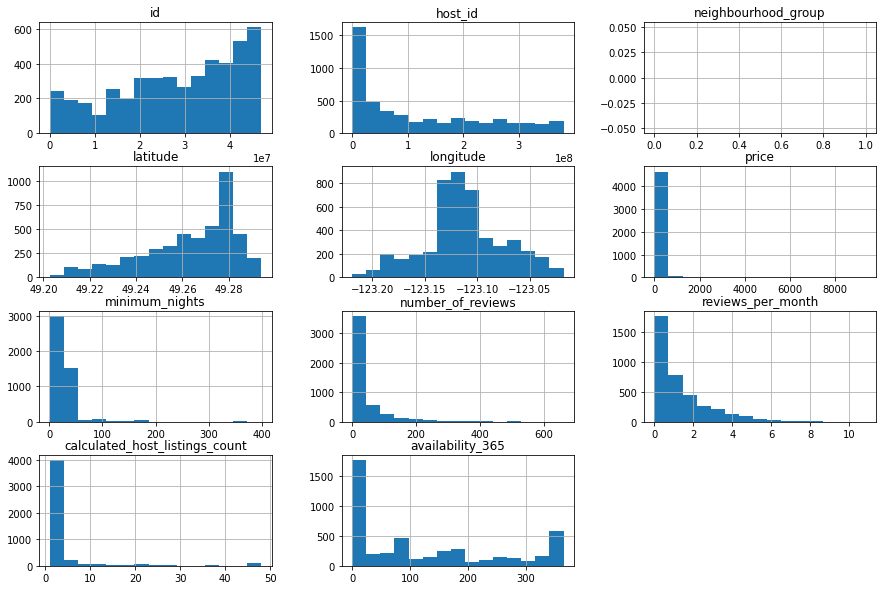

In [ ]:
# plotar o gistograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**


Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4685.000000,4685.000000,4685.000000,3809.000000,4685.000000,4685.000000
mean,151.473853,16.560085,33.991035,1.335529,4.040342,123.598719
std,199.613561,31.651761,58.499848,1.430142,8.112696,130.194115
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,2.000000,1.000000,0.280000,1.000000,0.000000
50%,111.000000,3.000000,10.000000,0.840000,1.000000,83.000000
75%,174.000000,30.000000,41.000000,1.910000,3.000000,227.000000
max,9346.000000,399.000000,662.000000,10.840000,48.000000,365.000000


Olhadno o resumo estatístico, podemos confirmar alguma hipóteses como:

* A variavel `price` possui 75% do valor abaixo de 174, porém seu valor máximo é 9346.

* A variavel `minimum_nights` o máximo de noite ultrapassa 365 dias, que indica um possível outlier.

#### Boxplot para minimum_nights

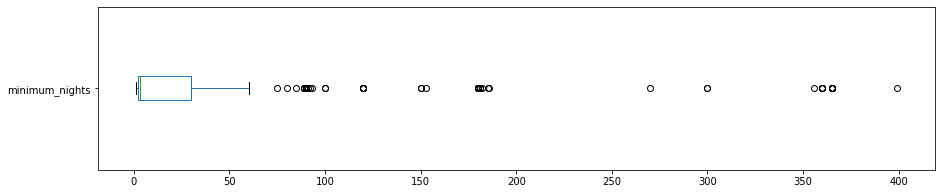

In [ ]:
# boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights -> valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100 ))

minimum_nights -> valores acima de 30:
308 entradas
6.5742%


#### Boxplot para price

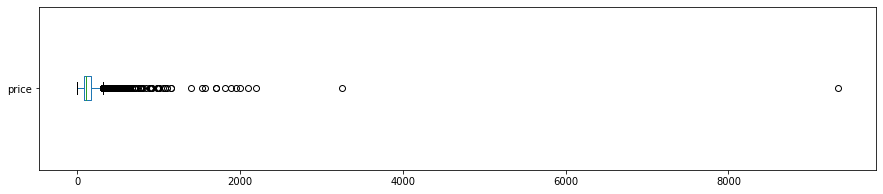

In [ ]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# ver a quantidade de valores acima de 500 dolares para price
print("price -> valores acima de $500:")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0]) * 100 ))

price -> valores acima de $500:
90 entradas
1.9210%


#### Histogramas sem outliers

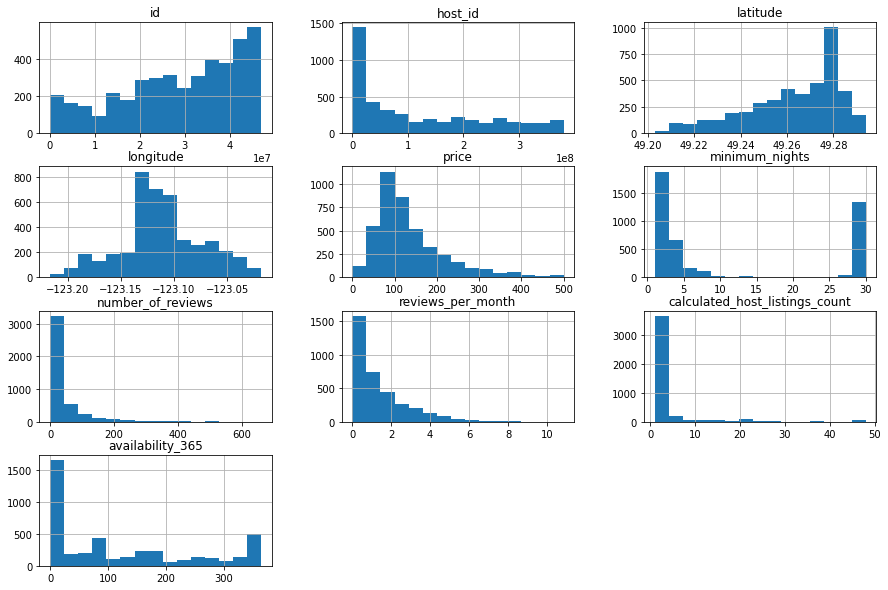

In [25]:
# remover os outliers em um novo df
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover o neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [27]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.133276,-0.068036,-0.100168,-0.113316,0.033859
minimum_nights,-0.133276,1.000000,-0.206977,-0.312485,0.313166,0.176607
number_of_reviews,-0.068036,-0.206977,1.000000,0.725376,-0.166389,0.024594
reviews_per_month,-0.100168,-0.312485,0.725376,1.000000,-0.185627,0.014651
calculated_host_listings_count,-0.113316,0.313166,-0.166389,-0.185627,1.000000,0.058214
availability_365,0.033859,0.176607,0.024594,0.014651,0.058214,1.000000


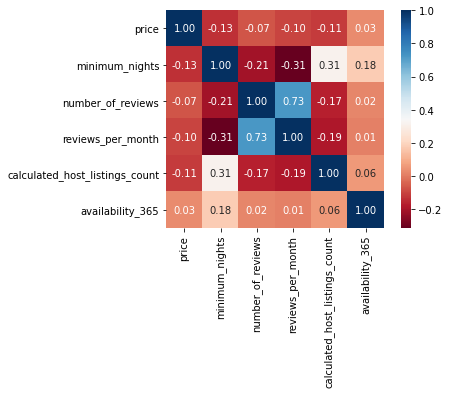

In [29]:
# criando o heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3218
Private room       1050
Shared room          18
Hotel room            5
Name: room_type, dtype: int64

In [31]:
# mostrar a % de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.749942
Private room       0.244698
Shared room        0.004195
Hotel room         0.001165
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset ?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [32]:
# comparar os valores por bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kitsilano             166.356725
West Point Grey       163.000000
Downtown Eastside     155.929515
Downtown              149.810009
Mount Pleasant        140.357692
Arbutus Ridge         139.338462
Grandview-Woodland    137.571429
Fairview              135.008130
West End              134.810631
South Cambie          131.886792
Name: price, dtype: float64

Acima, podemos ver que os bairros **TOP 3** são: Kitsilano, West Point Grey e Downtown Eastside.

Obs: Embora tenha sido feita essa análise, não significa que esses 3 bairros são os melhores bairros de Vancouver.

In [43]:
# ver a quantidade de imoveis em cada neighbourhood

# ver quantidade de imóveis no Kitsilano 
print("Kitsilano")
print(df_clean[df_clean.neighbourhood == "Kitsilano"].shape)
print("\n")

# ver quantidade de imóveis no West Point Grey  
print("West Point Grey")
print(df_clean[df_clean.neighbourhood == "West Point Grey"].shape)
print("\n")

# ver quantidade de imóveis no Downtown Eastside 
print("Downtown Eastside")
print(df_clean[df_clean.neighbourhood == "Downtown Eastside"].shape)
print("\n")

# ver quantidade de imóveis no Downtown
print("Downtown")
print(df_clean[df_clean.neighbourhood == "Downtown"].shape)
print("\n")

# ver quantidade de imóveis no Mount Pleasant  
print("Mount Pleasant")  
print(df_clean[df_clean.neighbourhood == "Mount Pleasant"].shape)
print("\n")

# ver quantidade de imóveis no Arbutus Ridge 
print("Arbutus Ridge")   
print(df_clean[df_clean.neighbourhood == "Arbutus Ridge"].shape)
print("\n")

# ver quantidade de imóveis no Grandview-Woodland
print("Grandview-Woodland")
print(df_clean[df_clean.neighbourhood == "Grandview-Woodland"].shape)
print("\n")

# ver quantidade de imóveis no Fairview 
print("Fairview")
print(df_clean[df_clean.neighbourhood == "Fairview"].shape)
print("\n")

# ver quantidade de imóveis no West End 
print("West End")  
print(df_clean[df_clean.neighbourhood == "West End"].shape)
print("\n")

# ver quantidade de imóveis no South Cambie 
print("South Cambie")
print(df_clean[df_clean.neighbourhood == "South Cambie"].shape)
print("\n")


Kitsilano
(342, 15)


West Point Grey
(58, 15)


Downtown Eastside
(227, 15)


Downtown
(1079, 15)


Mount Pleasant
(260, 15)


Arbutus Ridge
(65, 15)


Grandview-Woodland
(210, 15)


Fairview
(123, 15)


West End
(301, 15)


South Cambie
(53, 15)




Com isso também conseguimos identificar a **TOP 3** áreas com mais imóveis, que são: Downtown, Kitsilano e West End

### **Q8. É possível visualizar onde está localizado cada imóvel ?**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.



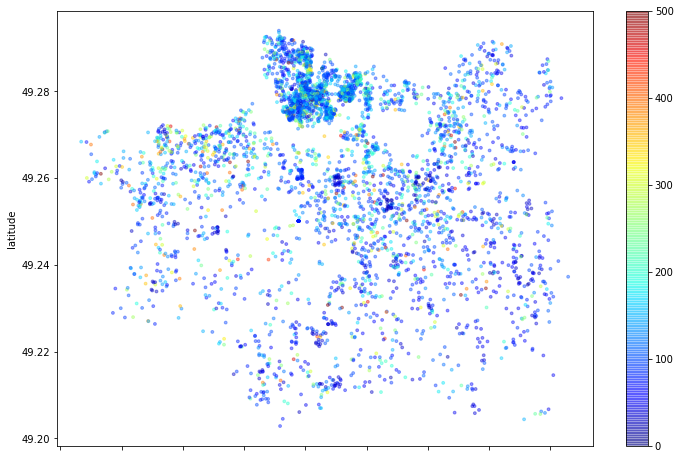

In [44]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Com essa análise superficial feita com o dataset do Airbnb já é possível gerar vários insights acionáveis. 

Foi possível identificar que existem outliers, mas também foi possível identificar quais localidades possuem mais imóveis, localidades que possuem os valores mais altos, qual a correlação existente entre as variáveis, qual a média dos imóveis, qual o tipo de imóveis mais alugado, entre outras.

